In [3]:
import matplotlib.pyplot as plt
import rawpy
import numpy as np
import os
import random
import torch
import sys
import cv2
from einops import rearrange
from matplotlib import rcParams, cycler
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

rcParams['figure.figsize'] = 16, 6
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

random.seed(40)

fname = '../data/LOL'
subfolders = ['/our485/high', '/our485/low' ]

def srgb_to_linear(x, eps=1e-8):
    # x = x.clamp(eps, 1.)
    x = np.clip(x, eps, 1.0)
    return np.where(x <= 0.04045, x / 12.92, ((x + 0.055) / 1.055) ** 2.4)

def normalize(img, idx=0):
    img_copy = img.copy()
    means = list(np.mean(rearrange(img_copy, 'b h w c -> (b h w) c'), axis=0))
    stds = list(np.std(rearrange(img_copy, 'b h w c -> (b h w) c'), axis=0))
    img_copy = torch.tensor(img_copy).permute(0, 3, 1, 2) - torch.tensor(means).view(1, 3, 1, 1)
    img_copy = img_copy * torch.tensor(data=[1/x for x in stds]).view(3, 1, 1)
    img_copy = img_copy.permute(0, 2, 3, 1).numpy()
    print(f'Means, {idx}: {means}')
    print(f'Std, {idx}: {stds}')
    return img_copy

In [6]:
fnames = sorted([os.path.join(path, name) for path, subdirs, files in os.walk(f'{fname}{subfolders[0]}') for name in files])
random.shuffle(fnames)

imgs = np.zeros((30, 400, 600, 3))
for i, file in enumerate(fnames[:30]):
    im = cv2.imread(file) / 255.0
    im = im[:, :, ::-1]
    imgs[i] = im

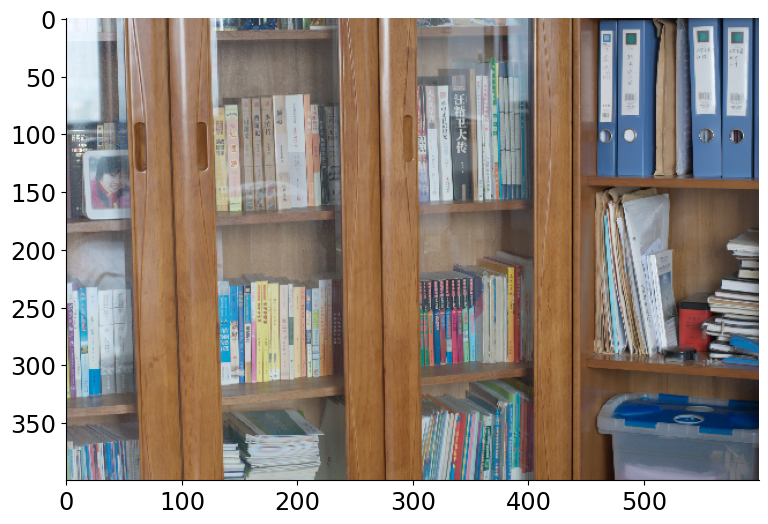

In [7]:
plt.figure()
plt.imshow(imgs[1])
plt.show()

srgb
Means, 0: [0.466934688998032, 0.44531254956382116, 0.41784806045606293]
Std, 0: [0.2156090219489801, 0.20786916118766066, 0.21535521694639095]
Means, 0: [0.8016045161571269, 0.7942926150211551, 0.7751734647216224]
Std, 0: [0.1287053816398992, 0.11791558378548588, 0.1360099292940132]
linear
Means, 0: [0.23707180375947584, 0.21525287219979827, 0.19681296582894534]
Std, 0: [0.20020763659803728, 0.19242212747191642, 0.19227298936432816]
Means, 0: [0.6390366659465929, 0.6240027297683423, 0.5996168454660861]
Std, 0: [0.1750894010016622, 0.16702398508005628, 0.1783439174407418]


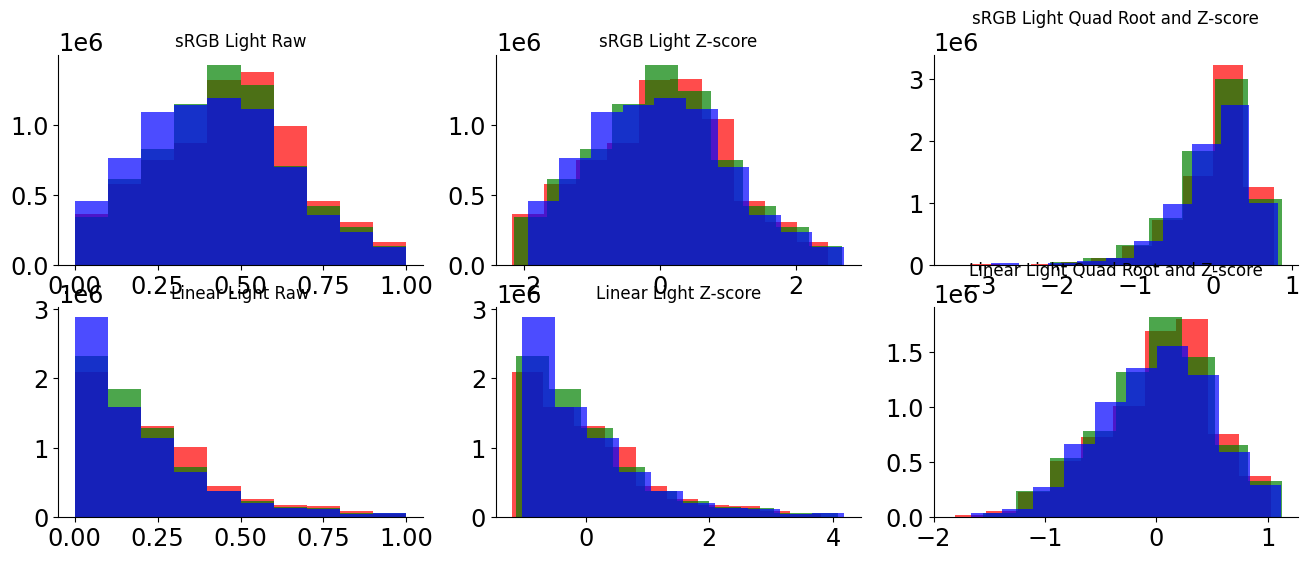

In [8]:
fig, ax = plt.subplots(2,3)
print('srgb')
img_copy = imgs.copy()
ax[0,0].hist(img_copy.reshape(-1, 3)[:, 0], color='red', alpha=0.7)
ax[0,0].hist(img_copy.reshape(-1, 3)[:, 1], color='green', alpha=0.7)
ax[0,0].hist(img_copy.reshape(-1, 3)[:, 2], color='blue', alpha=0.7)
ax[0,0].set_title('sRGB Light Raw')

img_copy = normalize(imgs)
# img_copy = np.clip(img_copy, None, 0.2)
ax[0,1].hist(img_copy.reshape(-1, 3)[:, 0], color='red', alpha=0.7)
ax[0,1].hist(img_copy.reshape(-1, 3)[:, 1], color='green', alpha=0.7)
ax[0,1].hist(img_copy.reshape(-1, 3)[:, 2], color='blue', alpha=0.7)
ax[0,1].set_title('sRGB Light Z-score')

img_copy = normalize(imgs ** (1/4)) / 2
# img_copy = np.clip(img_copy, None, 4)
ax[0,2].hist(img_copy.reshape(-1, 3)[:, 0], color='red', alpha=0.7)
ax[0,2].hist(img_copy.reshape(-1, 3)[:, 1], color='green', alpha=0.7)
ax[0,2].hist(img_copy.reshape(-1, 3)[:, 2], color='blue', alpha=0.7)
ax[0,2].set_title('sRGB Light Quad Root and Z-score')

print('linear')
img_copy = srgb_to_linear(imgs.copy())
ax[1,0].hist(img_copy.reshape(-1, 3)[:, 0], color='red', alpha=0.7)
ax[1,0].hist(img_copy.reshape(-1, 3)[:, 1], color='green', alpha=0.7)
ax[1,0].hist(img_copy.reshape(-1, 3)[:, 2], color='blue', alpha=0.7)
ax[1,0].set_title('Linear Light Raw')

img_copy = normalize(srgb_to_linear(imgs))
# img_copy = np.clip(img_copy, None, 0.2)
ax[1,1].hist(img_copy.reshape(-1, 3)[:, 0], color='red', alpha=0.7)
ax[1,1].hist(img_copy.reshape(-1, 3)[:, 1], color='green', alpha=0.7)
ax[1,1].hist(img_copy.reshape(-1, 3)[:, 2], color='blue', alpha=0.7)
ax[1,1].set_title('Linear Light Z-score')

img_copy = normalize(srgb_to_linear(imgs) ** (1/4)) / 2
# img_copy = np.clip(img_copy, None, 1.5)
ax[1,2].hist(img_copy.reshape(-1, 3)[:, 0], color='red', alpha=0.7)
ax[1,2].hist(img_copy.reshape(-1, 3)[:, 1], color='green', alpha=0.7)
ax[1,2].hist(img_copy.reshape(-1, 3)[:, 2], color='blue', alpha=0.7)
ax[1,2].set_title('Linear Light Quad Root and Z-score')
plt.show()

In [9]:
subfolder = subfolders[1]
print(subfolder)
fnames = sorted([os.path.join(path, name) for path, subdirs, files in os.walk(f'{fname}{subfolder}') for name in files])
random.shuffle(fnames)

imgs = np.zeros((30, 400, 600, 3))
for i, file in enumerate(fnames[:30]):
    im = cv2.imread(file) / 255.0
    im = im[:, :, ::-1]
    imgs[i] = im

/our485/low


Means, 0: [0.06484746568191385, 0.06638472167288008, 0.062147127447061114]
Std, 0: [0.0576573321100897, 0.05536856439354401, 0.057971929387473156]
Means, 0: [0.4467414161916026, 0.4661134649807611, 0.4439201930057282]
Std, 0: [0.16303339151172508, 0.13168580899139556, 0.1550140628907792]
Means, 0: [0.007565228920297186, 0.007596323102824397, 0.0073066430391471975]
Std, 0: [0.013166168220268403, 0.012903170319959795, 0.013678905226232711]
Means, 0: [0.24843236910749697, 0.25830970429918276, 0.24610891796198944]
Std, 0: [0.10034585952192457, 0.08517244518487499, 0.09678230799201158]


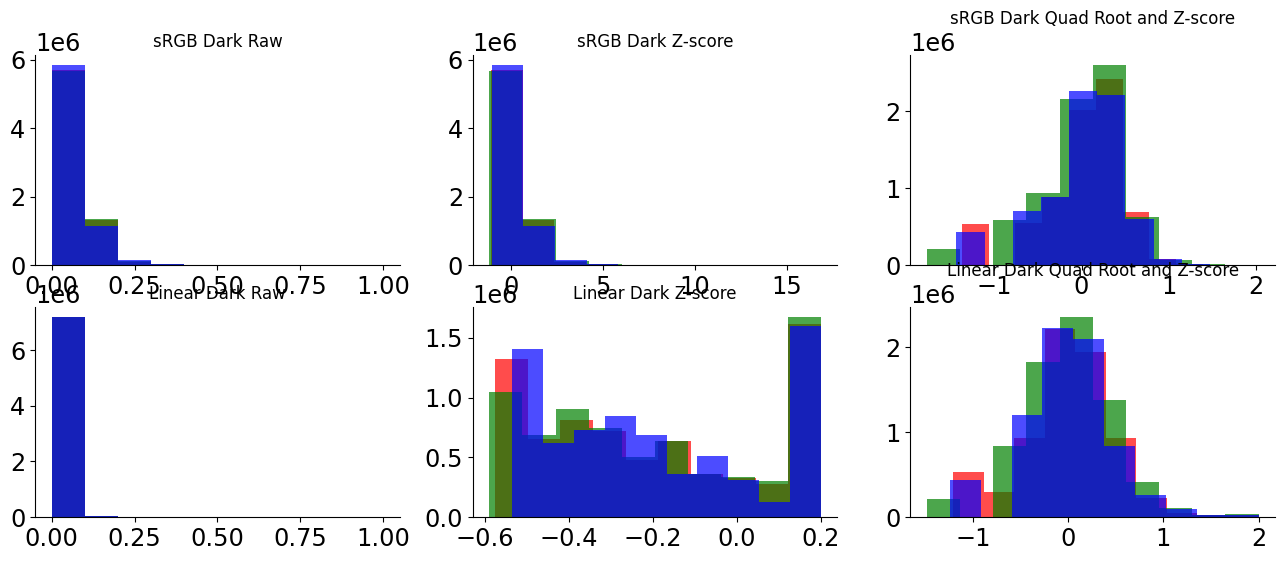

In [11]:
fig, ax = plt.subplots(2,3)
img_copy = imgs.copy()
ax[0,0].hist(img_copy.reshape(-1, 3)[:, 0], color='red', alpha=0.7)
ax[0,0].hist(img_copy.reshape(-1, 3)[:, 1], color='green', alpha=0.7)
ax[0,0].hist(img_copy.reshape(-1, 3)[:, 2], color='blue', alpha=0.7)
ax[0,0].set_title('sRGB Dark Raw')

img_copy = normalize(imgs)
# img_copy = np.clip(img_copy, None, 0.2)
ax[0,1].hist(img_copy.reshape(-1, 3)[:, 0], color='red', alpha=0.7)
ax[0,1].hist(img_copy.reshape(-1, 3)[:, 1], color='green', alpha=0.7)
ax[0,1].hist(img_copy.reshape(-1, 3)[:, 2], color='blue', alpha=0.7)
ax[0,1].set_title('sRGB Dark Z-score')

img_copy = normalize(imgs ** (1/4)) / 2
# img_copy = np.clip(img_copy, None, 4)
ax[0,2].hist(img_copy.reshape(-1, 3)[:, 0], color='red', alpha=0.7)
ax[0,2].hist(img_copy.reshape(-1, 3)[:, 1], color='green', alpha=0.7)
ax[0,2].hist(img_copy.reshape(-1, 3)[:, 2], color='blue', alpha=0.7)
ax[0,2].set_title('sRGB Dark Quad Root and Z-score')


img_copy = srgb_to_linear(imgs.copy())
ax[1,0].hist(img_copy.reshape(-1, 3)[:, 0], color='red', alpha=0.7)
ax[1,0].hist(img_copy.reshape(-1, 3)[:, 1], color='green', alpha=0.7)
ax[1,0].hist(img_copy.reshape(-1, 3)[:, 2], color='blue', alpha=0.7)
ax[1,0].set_title('Linear Dark Raw')

img_copy = normalize(srgb_to_linear(imgs))
img_copy = np.clip(img_copy, None, 0.2)
ax[1,1].hist(img_copy.reshape(-1, 3)[:, 0], color='red', alpha=0.7)
ax[1,1].hist(img_copy.reshape(-1, 3)[:, 1], color='green', alpha=0.7)
ax[1,1].hist(img_copy.reshape(-1, 3)[:, 2], color='blue', alpha=0.7)
ax[1,1].set_title('Linear Dark Z-score')

img_copy = normalize(srgb_to_linear(imgs) ** (1/4)) / 2
img_copy = np.clip(img_copy, None, 2)
ax[1,2].hist(img_copy.reshape(-1, 3)[:, 0], color='red', alpha=0.7)
ax[1,2].hist(img_copy.reshape(-1, 3)[:, 1], color='green', alpha=0.7)
ax[1,2].hist(img_copy.reshape(-1, 3)[:, 2], color='blue', alpha=0.7)
ax[1,2].set_title('Linear Dark Quad Root and Z-score')
plt.show()